# 🚲 서울시 자전거 이용 데이터 분석
본 프로젝트에서는 2024년 3월 서울시 공공자전거(따릉이) 데이터와 날씨 데이터를 활용하여

**시간대/요일별 이용량**, **인기 대여소/반납소**, **계절별 변화**, **날씨와의 상관관계**를 분석합니다.

데이터 분석입니다.

In [16]:
import pandas as pd

# 상위 폴더의 datas 폴더에서 CSV 파일 불러오기
bike_file_path = '../datas/cleaned_bike.csv'
weather_file_path = '../datas/cleaned_weather.csv'

df_bike = pd.read_csv(bike_file_path, encoding='cp949')
df_weather = pd.read_csv(weather_file_path, encoding='cp949')

# 데이터 확인
print("자전거 데이터:")
print(df_bike.head())

print("\n날씨 데이터:")
print(df_weather.head())


자전거 데이터:
                  대여일시                 대여소명 대여구분코드   성별 연령대코드  이용건수     운동량   
0  2024-12-01 00:00:00  1442. 중랑구청 중화동 별관 앞    정기권  NaN  ~10대     1  105.32  \
1  2024-12-01 00:00:00     2728.마곡나루역 3번 출구    정기권  NaN  ~10대     1   22.45   
2  2024-12-01 00:00:00     1023. 한국종합기술사옥 앞    정기권  NaN   20대     1  148.31   
3  2024-12-01 00:00:00       1150. 송정역 1번출구    정기권  NaN   20대     1   24.01   
4  2024-12-01 00:00:00  1260. 방이동 한양3차아파트 옆    정기권  NaN   20대     1   92.85   

    탄소량  이동거리(M)  이용시간(분)      요일  시간대  
0  0.66  2829.30       18  Sunday    0  
1  0.25  1090.00        7  Sunday    0  
2  0.87  3745.23       21  Sunday    0  
3  0.19   808.44        6  Sunday    0  
4  0.94  4042.55       35  Sunday    0  

날씨 데이터:
                    일시  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  지면온도(°C)  적설(cm)
0  2024-12-01 00:00:00     2.8      0.0      1.5     93       0.5     5.3
1  2024-12-01 01:00:00     2.5      0.0      1.9     94       0.2     5.0
2  2024-12-01 02:00:00     2.3      0.0

In [17]:
# 날짜 & 시간 단위로 정렬
df_bike["날짜시간"] = df_bike["대여일시"]  # 시간 단위로 내림
df_weather["날짜시간"] = df_weather["일시"]

# 병합: 대여 시간 기준으로 날씨 정보 결합
df_merged = pd.merge(df_bike, df_weather, on="날짜시간", how="left")

In [18]:
df_merged.head(5)

,대여일시,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일,시간대,날짜시간,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),지면온도(°C),적설(cm)
0,2024-12-01 00:00:00,1442. 중랑구청 중화동 별관 앞,정기권,NaN,~10대,1,105.32,0.66,2829.30,18,Sunday,0,2024-12-01 00:00:00,2024-12-01 00:00:00,2.8,0.0,1.5,93,0.5,5.3
1,2024-12-01 00:00:00,2728.마곡나루역 3번 출구,정기권,NaN,~10대,1,22.45,0.25,1090.00,7,Sunday,0,2024-12-01 00:00:00,2024-12-01 00:00:00,2.8,0.0,1.5,93,0.5,5.3
2,2024-12-01 00:00:00,1023. 한국종합기술사옥 앞,정기권,NaN,20대,1,148.31,0.87,3745.23,21,Sunday,0,2024-12-01 00:00:00,2024-12-01 00:00:00,2.8,0.0,1.5,93,0.5,5.3
3,2024-12-01 00:00:00,1150. 송정역 1번출구,정기권,NaN,20대,1,24.01,0.19,808.44,6,Sunday,0,2024-12-01 00:00:00,2024-12-01 00:00:00,2.8,0.0,1.5,93,0.5,5.3
4,2024-12-01 00:00:00,1260. 방이동 한양3차아파트 옆,정기권,NaN,20대,1,92.85,0.94,4042.55,35,Sunday,0,2024-12-01 00:00:00,2024-12-01 00:00:00,2.8,0.0,1.5,93,0.5,5.3


In [19]:
import numpy as np

# 이동거리(M)와 기온/강수량 간 상관계수 확인
corr_columns = ["이동거리(M)", "운동량", "이용시간(분)", "기온(°C)", "강수량(mm)", "풍속(m/s)", "습도(%)"]

# '\\N' 값을 NaN으로 변환
df_merged.replace('\\N', np.nan, inplace=True)

# 필요한 열을 숫자형으로 변환 (오류가 발생할 수 있으므로 errors='coerce' 사용)
df_merged[corr_columns] = df_merged[corr_columns].apply(pd.to_numeric, errors='coerce')

# 상관계수 계산
df_corr = df_merged[corr_columns].corr()

# 기온과 강수량 간의 상관계수 출력
print(df_corr[["기온(°C)", "강수량(mm)"]])

           기온(°C)   강수량(mm)
이동거리(M)  0.058023  0.004904
운동량      0.052830  0.005209
이용시간(분)  0.095388  0.002526
기온(°C)   1.000000  0.042996
강수량(mm)  0.042996  1.000000
풍속(m/s)  0.336194 -0.000969
습도(%)    0.000128  0.134462


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows의 경우

font_prop = fm.FontProperties(fname=font_path, size=14)
plt.rc('font', family=font_prop.get_name())

## 1. 연령대별 + 성별 이용 패턴

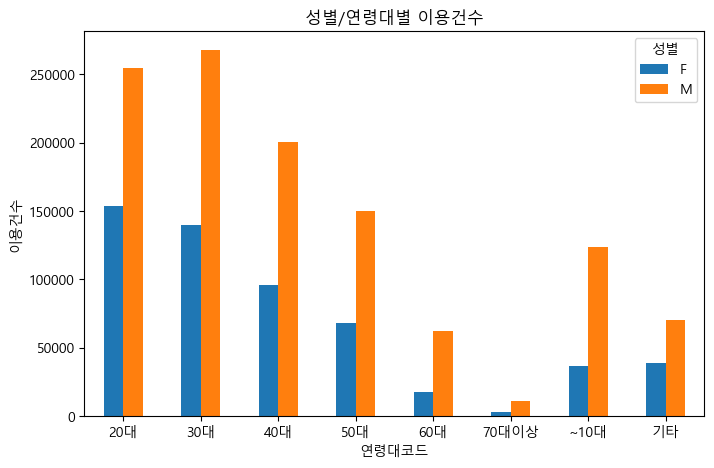

In [23]:
import os

# 성별-연령대별 이용건수 합계
pivot = df_merged.groupby(['연령대코드', '성별'])['이용건수'].sum().unstack()

pivot.plot(kind='bar', stacked=False, figsize=(8, 5), title='성별/연령대별 이용건수')
plt.ylabel("이용건수")
plt.xticks(rotation=0)

# 상위 폴더의 images 폴더에 그래프 저장
output_path = os.path.join('..', 'images', '성별_연령대별_이용건수.png')
plt.savefig(output_path, format='png')

# 그래프 보여주기
plt.show()

## 2. 요일 + 시간대

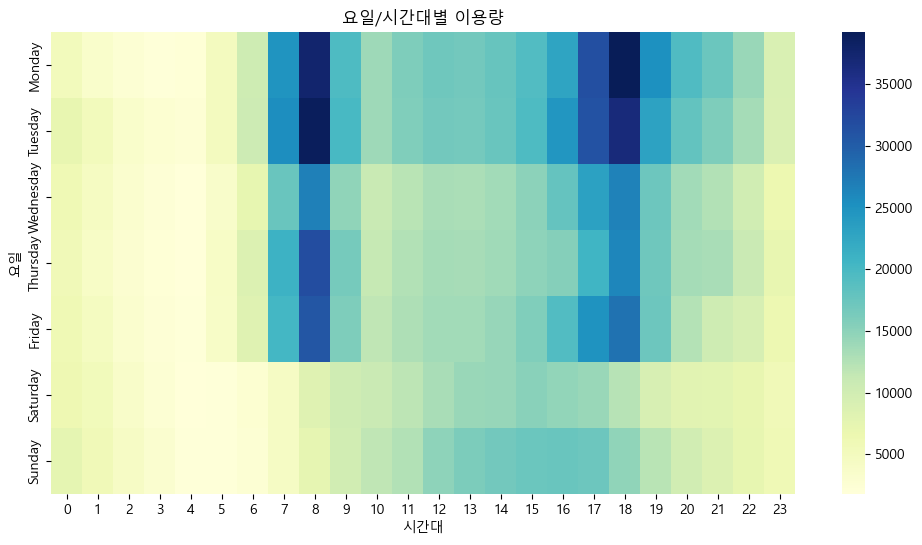

In [27]:
# 히트맵: 요일 vs 시간대
pivot = df_merged.groupby(['요일', '시간대']).size().unstack().fillna(0)
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot.reindex(order)
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('요일/시간대별 이용량')

# 상위 폴더의 images 폴더에 그래프 저장
output_path = os.path.join('..', 'images', '요일_시간대별_이용량.png')
plt.savefig(output_path, format='png')

# 그래프 보여주기
plt.show()

## 3. 계절별 이용량 변화

추가적인 12월 데이터 이외의 값 필요로 추후 업데이트

## 4. 날씨 정보와의 상관관계

In [40]:
# 대여일시에서 날짜별 대여건수 집계
df_bike['날짜'] = pd.to_datetime(df_bike['날짜시간']).dt.date  # 대여일시에서 날짜 추출
daily_bike = df_bike.groupby('날짜').size().reset_index(name='대여건수')

# 날씨 데이터의 날짜 형식 변환
df_weather['날짜시간'] = pd.to_datetime(df_weather['날짜시간']).dt.date

# 날별 이용량과 날씨 데이터 병합
merged = pd.merge(daily_bike, df_weather, left_on='날짜', right_on='날짜시간', how='inner')

# 상관관계 확인
correlation = merged.corr(numeric_only=True)
print(correlation)

              대여건수    기온(°C)   강수량(mm)   풍속(m/s)     습도(%)  지면온도(°C)    적설(cm)
대여건수      1.000000  0.300068 -0.070067 -0.102770 -0.087053  0.210210 -0.313559
기온(°C)    0.300068  1.000000  0.044531  0.302591  0.030697  0.862578  0.009167
강수량(mm)  -0.070067  0.044531  1.000000 -0.008206  0.175270  0.031547  0.080626
풍속(m/s)  -0.102770  0.302591 -0.008206  1.000000 -0.256185  0.391791  0.071340
습도(%)    -0.087053  0.030697  0.175270 -0.256185  1.000000 -0.040685  0.429307
지면온도(°C)  0.210210  0.862578  0.031547  0.391791 -0.040685  1.000000  0.120693
적설(cm)   -0.313559  0.009167  0.080626  0.071340  0.429307  0.120693  1.000000


In [41]:
merged

,날짜,대여건수,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),지면온도(°C),적설(cm),날짜시간
0,2024-12-01,55904,2024-12-01 00:00:00,2.8,0.0,1.5,93,0.5,5.3,2024-12-01
1,2024-12-01,55904,2024-12-01 01:00:00,2.5,0.0,1.9,94,0.2,5.0,2024-12-01
2,2024-12-01,55904,2024-12-01 02:00:00,2.3,0.0,1.7,94,0.0,5.0,2024-12-01
3,2024-12-01,55904,2024-12-01 03:00:00,1.9,0.0,2.5,95,0.0,5.0,2024-12-01
4,2024-12-01,55904,2024-12-01 04:00:00,1.7,0.0,1.9,95,-0.1,5.0,2024-12-01
...,...,...,...,...,...,...,...,...,...,...
739,2024-12-31,68769,2024-12-31 19:00:00,0.5,0.0,1.9,46,-0.6,0.0,2024-12-31
740,2024-12-31,68769,2024-12-31 20:00:00,0.0,0.0,2.4,48,-0.9,0.0,2024-12-31
741,2024-12-31,68769,2024-12-31 21:00:00,-0.7,0.0,1.0,51,-1.3,0.0,2024-12-31
742,2024-12-31,68769,2024-12-31 22:00:00,-1.0,0.0,0.7,53,-1.9,0.0,2024-12-31


C:\Users\mj985\AppData\Local\Temp\ipykernel_20092\680736830.py:11: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(os.path.join(save_dir, '기온_대여건수.png'))  # 그래프 저장
c:\Users\mj985\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


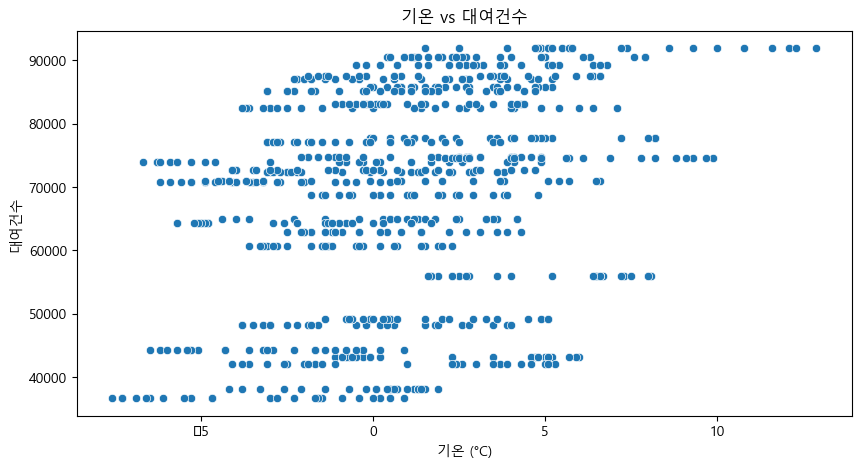

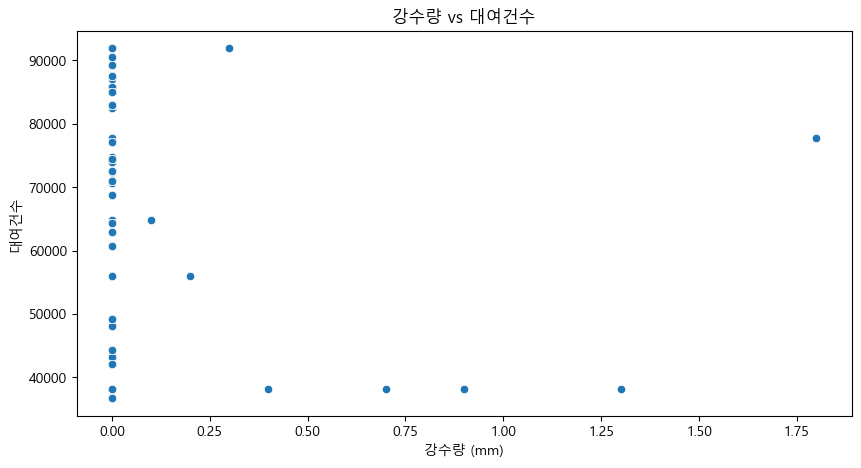

In [43]:
# 이미지 저장 경로 설정
save_dir = '../images'  # 상위 폴더의 images 폴더
os.makedirs(save_dir, exist_ok=True)  # 폴더가 없으면 생성

# 시각화: 기온 vs 대여건수
plt.figure(figsize=(10, 5))
sns.scatterplot(data=merged, x='기온(°C)', y='대여건수')
plt.title('기온 vs 대여건수')
plt.xlabel('기온 (°C)')
plt.ylabel('대여건수')
plt.savefig(os.path.join(save_dir, '기온_대여건수.png'))  # 그래프 저장
plt.show()

# 시각화: 강수량 vs 대여건수
plt.figure(figsize=(10, 5))
sns.scatterplot(data=merged, x='강수량(mm)', y='대여건수')
plt.title('강수량 vs 대여건수')
plt.xlabel('강수량 (mm)')
plt.ylabel('대여건수')
plt.savefig(os.path.join(save_dir, '강수량_대여건수.png'))  # 그래프 저장
plt.show()

## 5. 이동거리 운동량

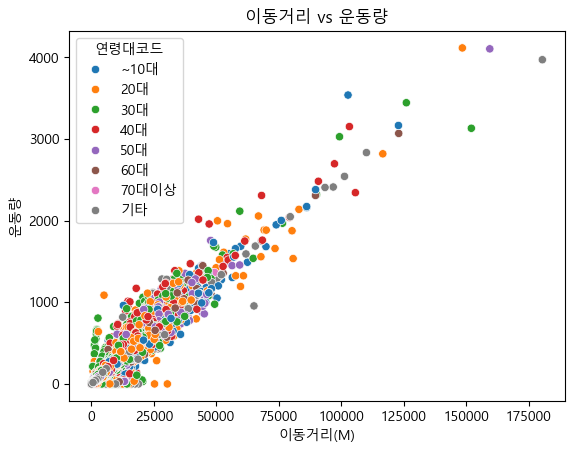

In [45]:
sns.scatterplot(data=df_merged, x="이동거리(M)", y="운동량", hue="연령대코드")
plt.title("이동거리 vs 운동량")
plt.xlabel("이동거리(M)")
plt.ylabel("운동량")
plt.savefig(os.path.join(save_dir, '이동거리_운동량.png'))  # 그래프 저장
plt.show()

## 6. 인기 대여소 (TOP10)

In [46]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126133 entries, 0 to 2126132
Data columns (total 22 columns):
 #   Column    Dtype         
---  ------    -----         
 0   대여일시      object        
 1   대여소명      object        
 2   대여구분코드    object        
 3   성별        object        
 4   연령대코드     object        
 5   이용건수      int64         
 6   운동량       float64       
 7   탄소량       object        
 8   이동거리(M)   float64       
 9   이용시간(분)   int64         
 10  요일        object        
 11  시간대       int64         
 12  날짜시간      datetime64[ns]
 13  일시        object        
 14  기온(°C)    float64       
 15  강수량(mm)   float64       
 16  풍속(m/s)   float64       
 17  습도(%)     int64         
 18  지면온도(°C)  float64       
 19  적설(cm)    float64       
 20  month     int32         
 21  season    object        
dtypes: datetime64[ns](1), float64(7), int32(1), int64(4), object(9)
memory usage: 348.8+ MB


🚲 대여 기준 Top 10 대여소:
대여소명
2715.마곡나루역 2번 출구           8069
2701. 마곡나루역 5번출구 뒤편        5976
2728.마곡나루역 3번 출구           5275
230. 영등포구청역 1번출구           5089
1153. 발산역 1번, 9번 인근 대여소    5075
1210. 롯데월드타워(잠실역2번출구 쪽)    5037
5052. 마곡역 7번출구             4130
781.신정보도육교 아래              4090
1124. 발산역 6번 출구 뒤          3992
502. 자양(뚝섬한강공원)역 1번출구 앞    3712
Name: count, dtype: int64


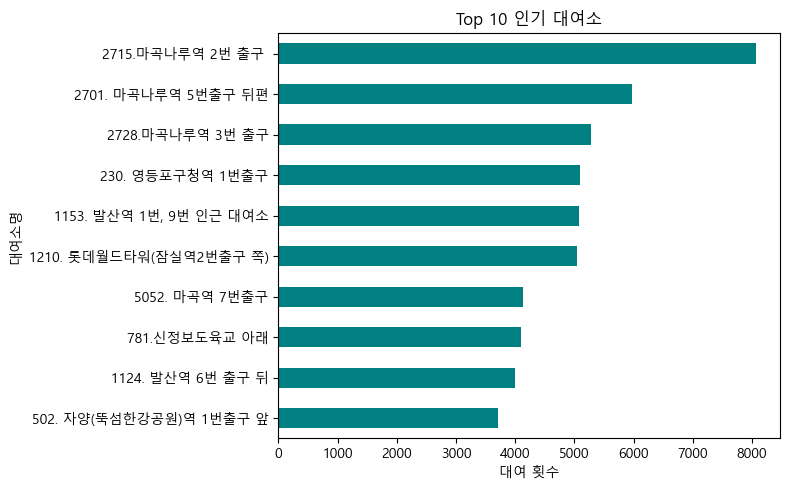

In [49]:
# 대여 기준 인기 대여소 Top 10
top_stations = df_merged["대여소명"].value_counts().head(10)

print("🚲 대여 기준 Top 10 대여소:")
print(top_stations)

# 시각화
import matplotlib.pyplot as plt

top_stations.plot(kind="barh", figsize=(8, 5), color="teal")
plt.gca().invert_yaxis()
plt.title("Top 10 인기 대여소")
plt.xlabel("대여 횟수")
plt.tight_layout()

plt.savefig(os.path.join(save_dir, '대여_TOP10.png'))  # 그래프 저장
plt.show()

## 7. 대여코드별 사용시간

In [48]:
df_merged['대여구분코드'].unique()

array(['정기권', '일일권', '일일권(비회원)'], dtype=object)

🧾 대여구분코드별 총 이용건수:
대여구분코드
정기권         2029422
일일권          238193
일일권(비회원)      10304
Name: 이용건수, dtype: int64


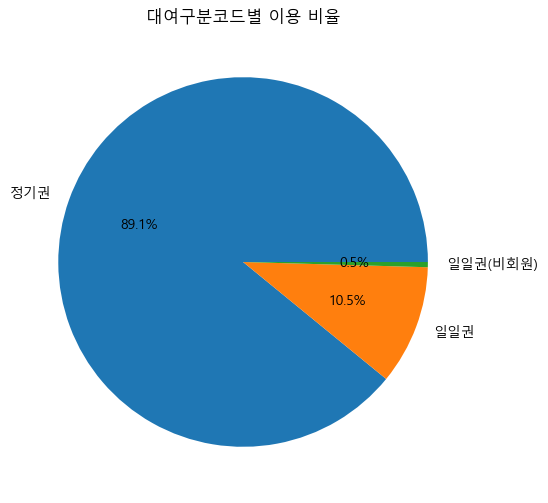

In [51]:
# 대여구분코드별 이용건수 합계
usage_by_type = df_merged.groupby("대여구분코드")["이용건수"].sum().sort_values(ascending=False)

print("🧾 대여구분코드별 총 이용건수:")
print(usage_by_type)

# 파이 차트 시각화
usage_by_type.plot(kind="pie", autopct="%.1f%%", figsize=(6, 6), title="대여구분코드별 이용 비율", ylabel="")
plt.savefig(os.path.join(save_dir, '대여 유형별 이용 비율.png'))  # 그래프 저장
plt.show()

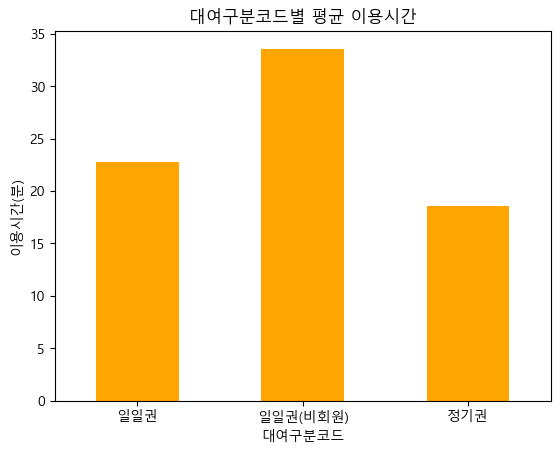

In [52]:
avg_time_by_type = df_merged.groupby("대여구분코드")["이용시간(분)"].mean()

avg_time_by_type.plot(kind="bar", color="orange", title="대여구분코드별 평균 이용시간", ylabel="이용시간(분)")
plt.xticks(rotation=0)
plt.savefig(os.path.join(save_dir, '대여 유형별 이용 시간.png'))  # 그래프 저장
plt.show()

In [53]:
# 데이터프레임을 상위 폴더의 datas 폴더에 저장
data_save_dir = '../datas'  # 상위 폴더의 datas 폴더
os.makedirs(data_save_dir, exist_ok=True)  # 폴더가 없으면 생성
df_merged.to_csv(os.path.join(data_save_dir, 'merged_data.csv'), encoding='cp949', index=False)  # CSV 저장